In [33]:
#  Needed imports
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

%matplotlib inline

# Solving the Black-Scholes model for implied volatility

The price of a call option is given by,
$$C = \Phi(d_1) S - \Phi(d_2) K e^{-r t},$$
where $S$ is the stock price, $K$ is the strike price, $r$ is the annualized risk-free rate, and $t$ is the time until expiration measured in years  .

$d_1$ and $d_2$ are respectively given by,
$$d_1 = \frac{1}{\sigma \sqrt{t}} \left[ \ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma.^2}{2}\right) t\right],$$
and
$$d_2 = d_1 - \sigma \sqrt{t}.$$
In the above expressions, $\sigma$ is the implied volaility.

We can get the price of a Put option from put-call parity.  It is given by,
$$P = \Phi(-d_2)e^{-rt} - \Phi(-d_1)S.$$

If we wwish to solve for the implied volatility of a call option whose price from the option chain is $C0$, we need to solve the equation,
$$C(\sigma) - C0 = 0$$
for $\sigma$.

In [34]:
#  Define functions for the d values, the price of a call, the price of a put, and the value of vega.
def d(sigma, S, K, r, t):
    d1 = 1 / (sigma * np.sqrt(t)) * ( np.log(S/K) + (r + sigma**2/2) * t)
    d2 = d1 - sigma * np.sqrt(t)
    return d1, d2

def call_price(sigma, S, K, r, t, d1, d2):
    C = norm.cdf(d1) * S - norm.cdf(d2) * K * np.exp(-r * t)
    return C

def put_price(sigma, S, K, r, t, d1, d2):
    P = -norm.cdf(-d1) * S + norm.cdf(-d2) * K * np.exp(-r * t)
    return P

def f(sigma, S, K, r, t, C0):
    d1, d2 = d(sigma, S, K, r, t)
    C = call_price(sigma, S, K, r, t, d1, d2) - C0
    return C

def vega(sigma, S, K, r, t, C0):
    d1, d2 = d(sigma, S, K, r, t)
    v = S * norm.pdf(d1) * np.sqrt(t)
    return [v]

In [35]:
#  Option parameters
S = 100.0
K = 105.0
t = 30.0 / 365.0
r = 0.01
C0 =2.30

C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


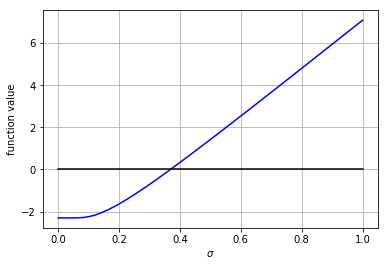

In [41]:
#  Plot the function we are trying to solve
sigma = np.linspace(0, 1)
plt.plot(sigma, f(sigma, S, K, r, t, C0), 'b')

#  Plot a horizontal line at y = 0 just to show the zero-crossing a bit more clearly.
plt.plot([0,1], [0,0], 'k')

plt.xlabel('$\sigma$')
plt.ylabel('function value')
plt.grid(True)

# Calling fsolve

For details on the fsolve function see the documentation [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html).

Optionally, we may pass in a second function that calculates the derivative the function we are trying to solve.  As noted, this is not necessary, as fsolve can numerically estimate the derivative, but it can lead to performance boosts since numerically calculating the derivative is expensive.

Since we already have an expression for veg-- the derivative of the option price with respect to volatility--  we make use of this addition argument.

In [37]:
#  Make a call to fsolve and print the result.
vol = fsolve(f, 0.5, fprime = vega,  args = (S, K, r, t, C0))
print(vol)

[0.36885632]
